<a href="https://colab.research.google.com/github/jha-vineet69/Sales-Forecasting-and-EDA/blob/master/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Keep Things Cleaner
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

#Working with Data
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#General Utility
import os
import time
import datetime as dt

#Fav Styling Options
#Option 1:
sns.set_style('whitegrid')
sns.set_palette('rainbow')
#Option 2:
#plt.style.use('fivethirtyeight')
#Option 3:
#plt.style.use('ggplot')

#Forecasting
import statsmodels.api as sm
import itertools
import pickle
from fbprophet import Prophet

### FORECASTING

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jha-vineet69/Sales-Forecasting-and-EDA/master/SalesCleaned.csv')

In [3]:
df.set_index('OrderID', inplace=True)

In [4]:
df['OrderDate'] = df['OrderDate'].astype('datetime64[ns]')
df['ShipDate'] = df['ShipDate'].astype('datetime64[ns]')

In [5]:
df3 = df.copy()
df3.head()

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
OrderID,,,,,,,,,,,,,,,,
CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df3.sort_values('OrderDate')
df3 = df3.groupby('OrderDate')['Sales'].sum().reset_index()
df3 = df3.set_index('OrderDate')
y = df3['Sales'].resample('MS').mean()
y

OrderDate
2015-01-01    1253.402348
2015-02-01     572.203818
2015-03-01    2077.988154
2015-04-01     977.145760
2015-05-01    1093.351481
2015-06-01    1122.359023
2015-07-01    1407.782320
2015-08-01    1556.219396
2015-09-01    2536.784608
2015-10-01    1382.477880
2015-11-01    2384.053944
2015-12-01    2444.935027
2016-01-01    1630.410356
2016-02-01    1090.965895
2016-03-01    1379.587104
2016-04-01    1585.707021
2016-05-01    1139.316981
2016-06-01    1239.822096
2016-07-01    1242.317826
2016-08-01    2133.779565
2016-09-01    2513.576808
2016-10-01    1171.551444
2016-11-01    1923.428654
2016-12-01    1958.958637
2017-01-01    1729.462909
2017-02-01    2223.072273
2017-03-01    1749.647893
2017-04-01    1629.540308
2017-05-01    2315.580421
2017-06-01    1386.099296
2017-07-01    1606.228577
2017-08-01    1634.529086
2017-09-01    1403.182976
2017-10-01    1931.739185
2017-11-01    2371.162393
2017-12-01    2698.040204
2018-01-01    2390.683640
2018-02-01    2127.340583
20

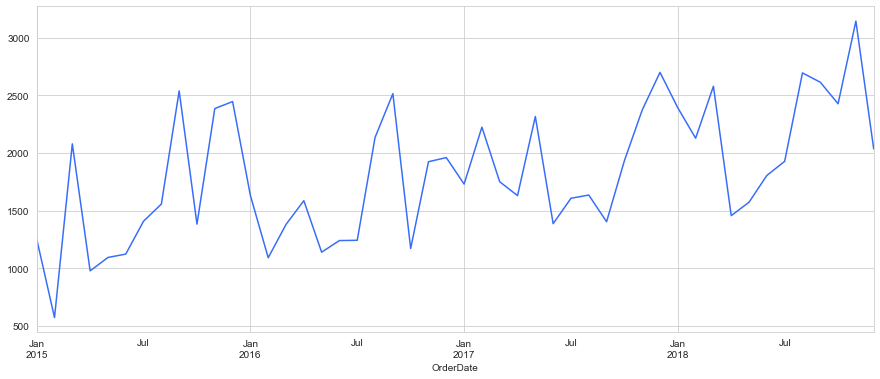

In [7]:
y.plot(figsize=(15, 6));

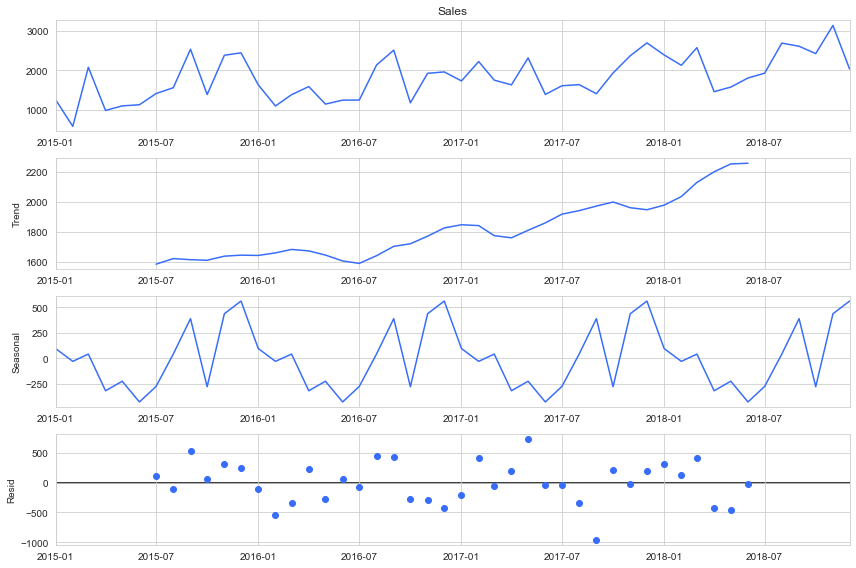

In [8]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show();

Sales is unstable. Seasonality can easily be seen. Trend is upwards.

### Time series forecasting with ARIMA

In [9]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [10]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:845.7158548296361
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1650.3560530188363


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:551.8547688992726
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:369.7757255365674
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:567.6469134501882


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1409.0592110803375
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:384.3657842405501
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:371.28580005144033
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:787.6806834685094


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2728.0418288365254
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:537.2958517583661
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:349.7768332044561
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:569.0585246464029


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2595.9323684383257
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:383.53998102348925
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:351.4905940290645
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:725.2126354998784


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1281.6303412979466
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:552.1948197733961
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:353.4629823444233
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:544.092921608238


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1142.2566498758902
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:374.6192830343718
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:355.3505125003024
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:691.4161566707521


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1729.9723719006452
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:519.8420096453227
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:327.2722620214678
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:538.223516753037


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2585.7680239905817
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:364.3408618167384
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:328.01691240325465
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:742.1450974125148


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1219.1388332408367
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:552.2467906210155
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:367.2775832416826
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:545.3239117506653


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1574.988035226936
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:368.04311931550217
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:368.36718316660813
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:708.2997338061526
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2668.0177445253607
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:539.0097864170813
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:344.4372167411899
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:535.6561511995491


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:2630.6022314920824
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:365.00441145477134
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:345.1932263664469
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:715.523296159752


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1355.9961671114006
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:547.2097420511246
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:350.6524077324984
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:525.0404194433037
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1388.0770591381772
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:353.87397892842904
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:352.2667232279438
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:692.1665975445829


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1025.8550119735623
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:521.3704592638634
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:329.0884860171153
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:521.7432246384635


C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:442.40577450415515
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:348.7970066863427
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:329.99659696241326


Lowest AIC 348.8 at ARIMA(1, 1, 1)x(1, 1, 0, 12)

### Fitting the ARIMA model

In [11]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12),
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0947      0.190      0.498      0.618      -0.278       0.468
ma.L1         -1.0000      0.254     -3.934      0.000      -1.498      -0.502
ar.S.L12      -0.5133      0.183     -2.807      0.005      -0.872      -0.155
sigma2      2.569e+05   9.89e-07    2.6e+11      0.000    2.57e+05    2.57e+05


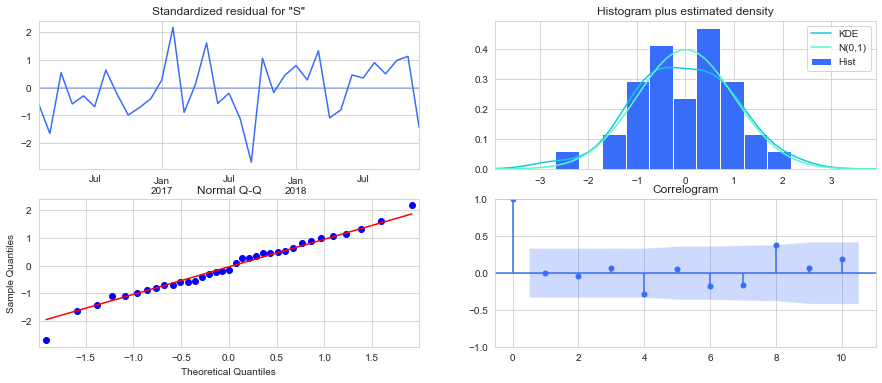

In [12]:
results.plot_diagnostics(figsize=(15,6))
plt.show()

In [13]:
import pickle
filename = 'arima_model.h5'
pickle.dump(model, open(filename, 'wb'))

### Validating forecasts

            lower Sales  upper Sales
OrderDate                           
2018-01-01   952.521407  2999.334024
2018-02-01   962.619746  3006.016775
2018-03-01   868.188531  2908.538100
2018-04-01  1003.015860  3040.629615
2018-05-01   970.420611  3005.564713
2018-06-01   552.354896  2585.258460
2018-07-01   732.297813  2763.159482
2018-08-01  1213.543902  3242.537021
2018-09-01  1343.844335  3371.121071
2018-10-01   907.714850  2933.409507
2018-11-01  1550.651309  3574.883020
2018-12-01  1760.983005  3783.857935


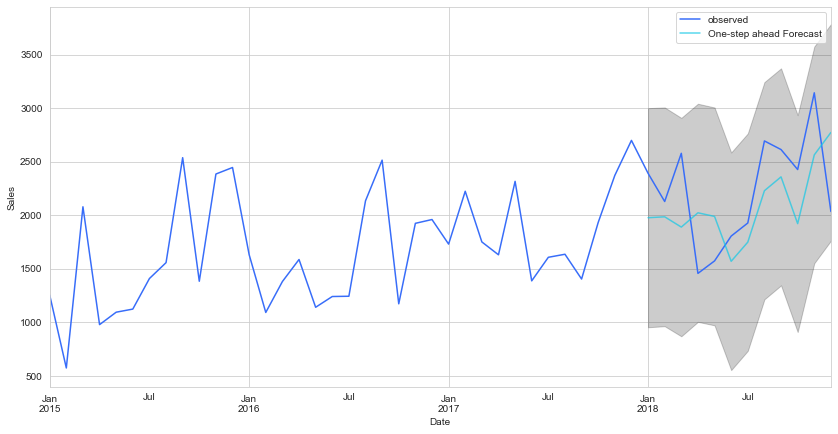

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

The above plot demonstrates that the predicted values aligns well with the true values capturing an upward seasonality. Now, we calculate the Mean Square Error of our predicted values wrt the orignal values.

In [15]:
y_predicted = pred.predicted_mean
y_true = y['2018-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 222184.964


In [16]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 471.3650008377205


### Producing and visualizing forecasts

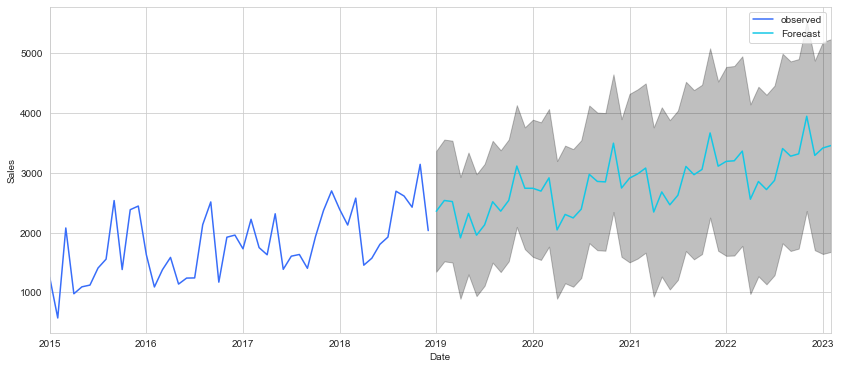

In [17]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

Here, note that the confidence interval is increasing as we move further into the future. The model becomes less confident in predicting the values as we move ahead.

In [18]:
df4 = df.copy()
df4.head()

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales
OrderID,,,,,,,,,,,,,,,,
CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
df4.sort_values('OrderDate')
df4 = df4.groupby('OrderDate')['Sales'].sum().reset_index()
df4 = df4.set_index('OrderDate')
df4

,Sales
OrderDate,
2015-01-02,468.9000
2015-01-03,2203.1510
2015-01-04,119.8880
2015-01-06,5188.5200
2015-01-07,601.0240
...,...
2018-12-26,814.5940
2018-12-27,177.6360
2018-12-28,1657.3508


In [20]:
train=df4[0:1201] 
test=df4[1201:]
print(train.head())
print(test.head())

               Sales
OrderDate           
2015-01-02   468.900
2015-01-03  2203.151
2015-01-04   119.888
2015-01-06  5188.520
2015-01-07   601.024
               Sales
OrderDate           
2018-11-30  6645.282
2018-12-01   848.520
2018-12-03   353.280
2018-12-04    69.660
2018-12-05   970.384


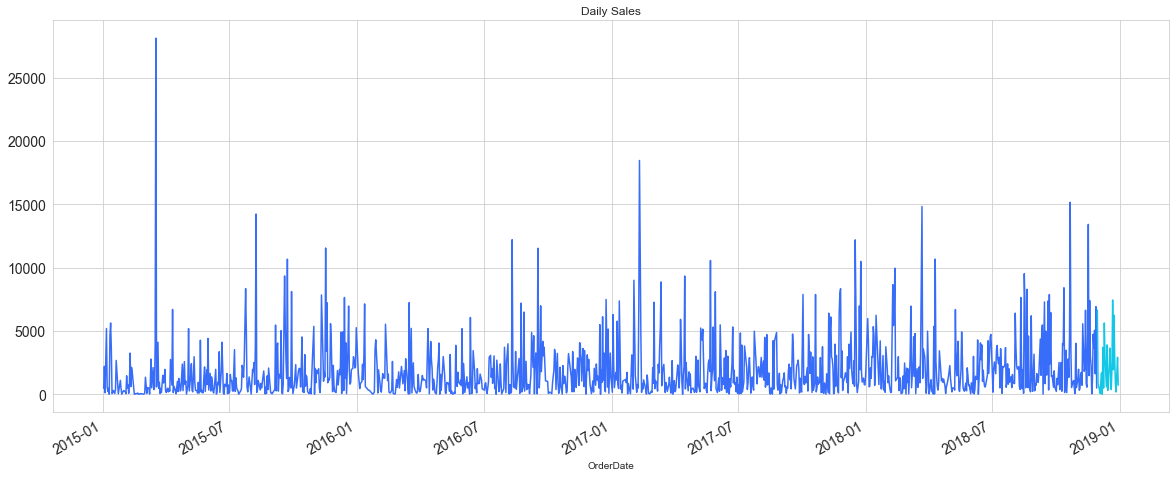

In [21]:
train.Sales.plot(figsize=(20,8), title= 'Daily Sales', fontsize=14)
test.Sales.plot(figsize=(20,8), title= 'Daily Sales', fontsize=14)
plt.show()

### Starting off with Naive Approach

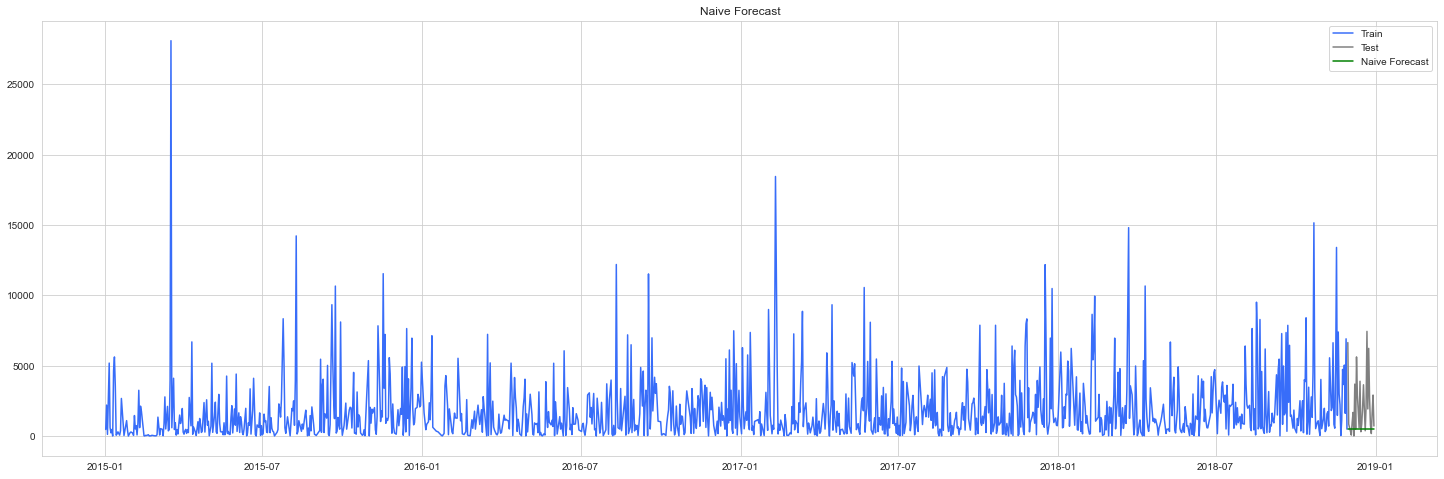

In [22]:
dd= np.asarray(train.Sales)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(25,8))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index,test['Sales'], label='Test', color = 'grey')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast', color = 'green')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Sales, y_hat.naive))
print(rms)

2671.618063702987


### Simple Average

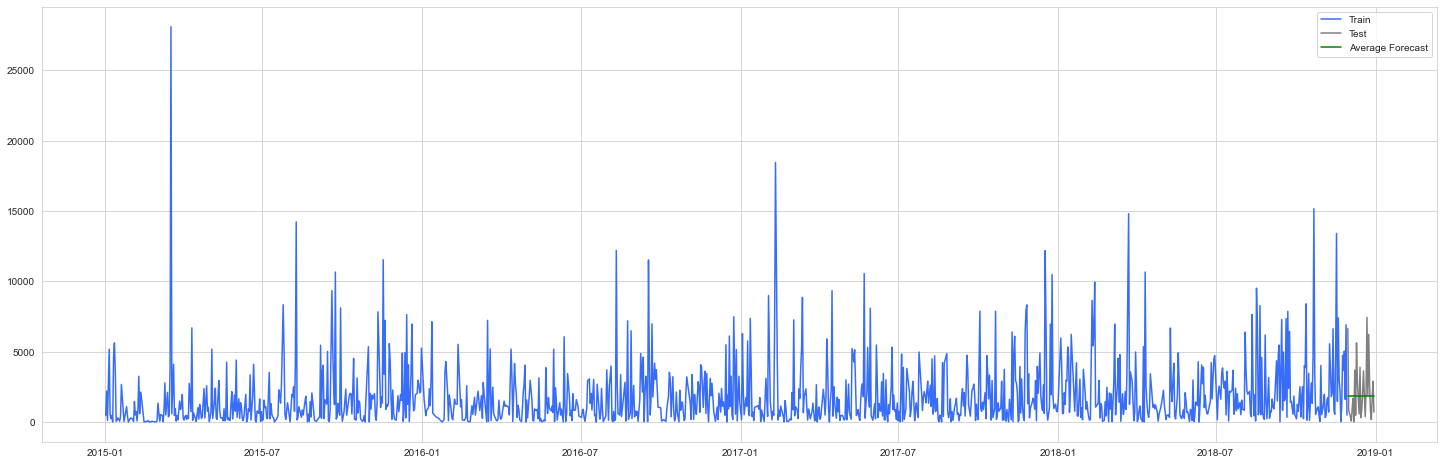

In [24]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()
plt.figure(figsize=(25,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test', color='grey')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast', color='green')
plt.legend(loc='best')
plt.show()

In [25]:
rms = sqrt(mean_squared_error(test.Sales, y_hat_avg.avg_forecast))
print(rms)

2091.6368330441455


### Moving Average

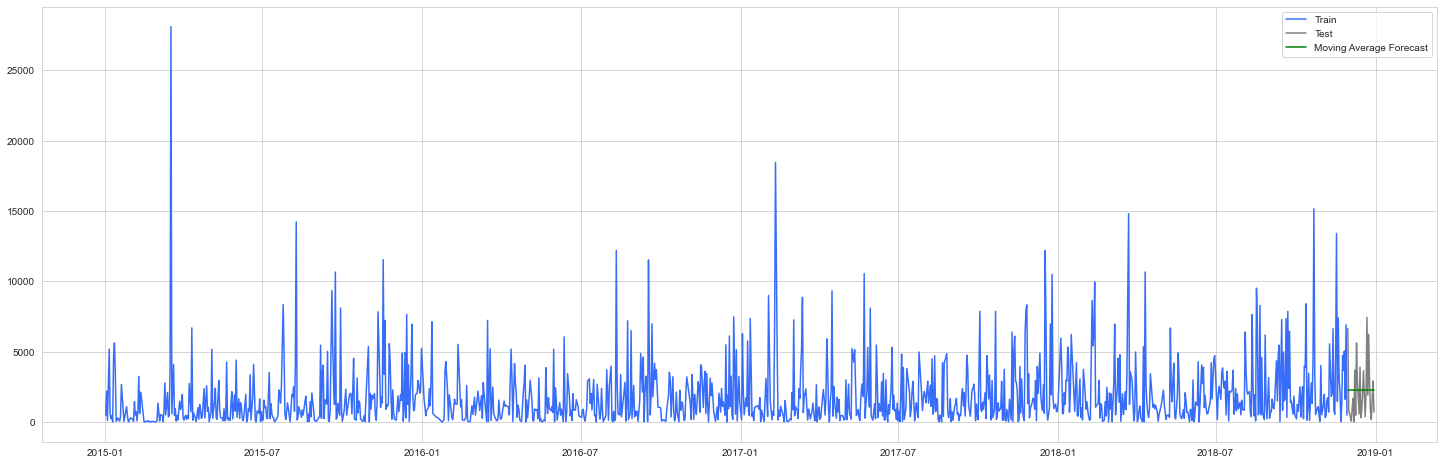

In [26]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Sales'].rolling(365).mean().iloc[-1]
plt.figure(figsize=(25,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test', color='grey')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast', color='green')
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(test.Sales, y_hat_avg.moving_avg_forecast))
print(rms)

2061.123941748061


### Simple Exponential Smoothing

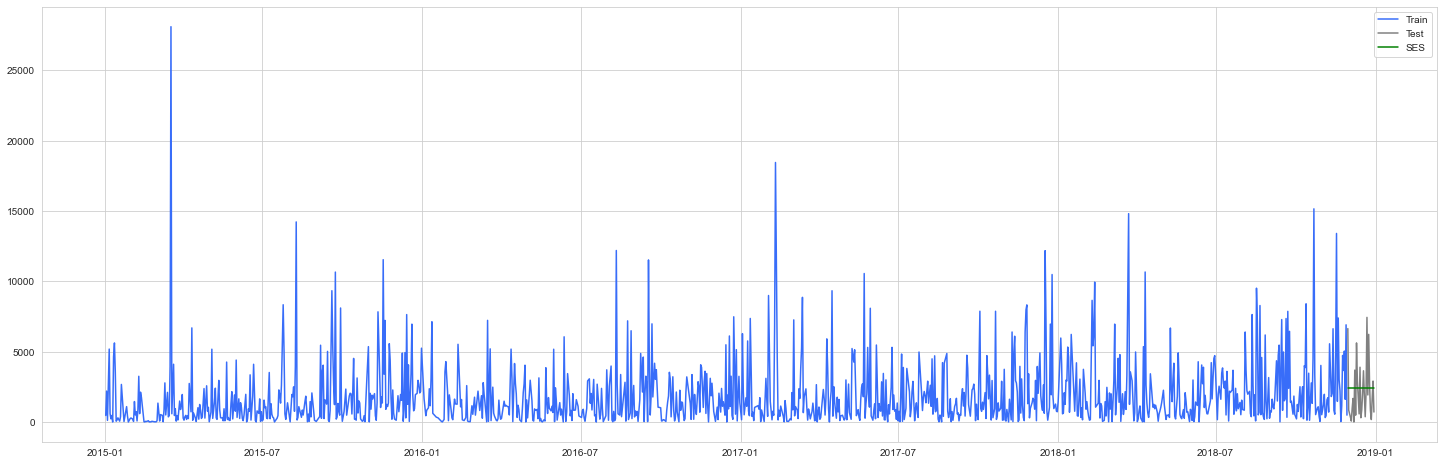

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Sales'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(25,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test', color='grey')
plt.plot(y_hat_avg['SES'], label='SES', color='green')
plt.legend(loc='best')
plt.show()

In [29]:
rms = sqrt(mean_squared_error(test.Sales, y_hat_avg.SES))
print(rms)

2069.5573680828834


### Holt's Linear Trend Model

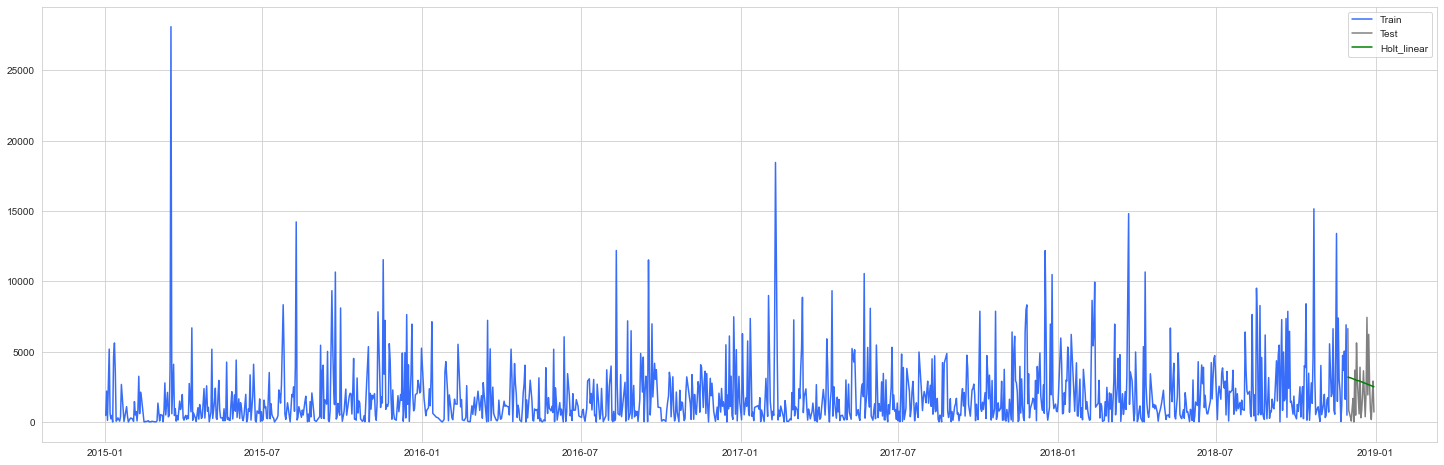

In [30]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(25,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test', color='grey')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear', color='green')
plt.legend(loc='best')
plt.show()

In [31]:
rms = sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_linear))
print(rms)

2182.2997500755882


### Holt Winter

C:\Users\Shailesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


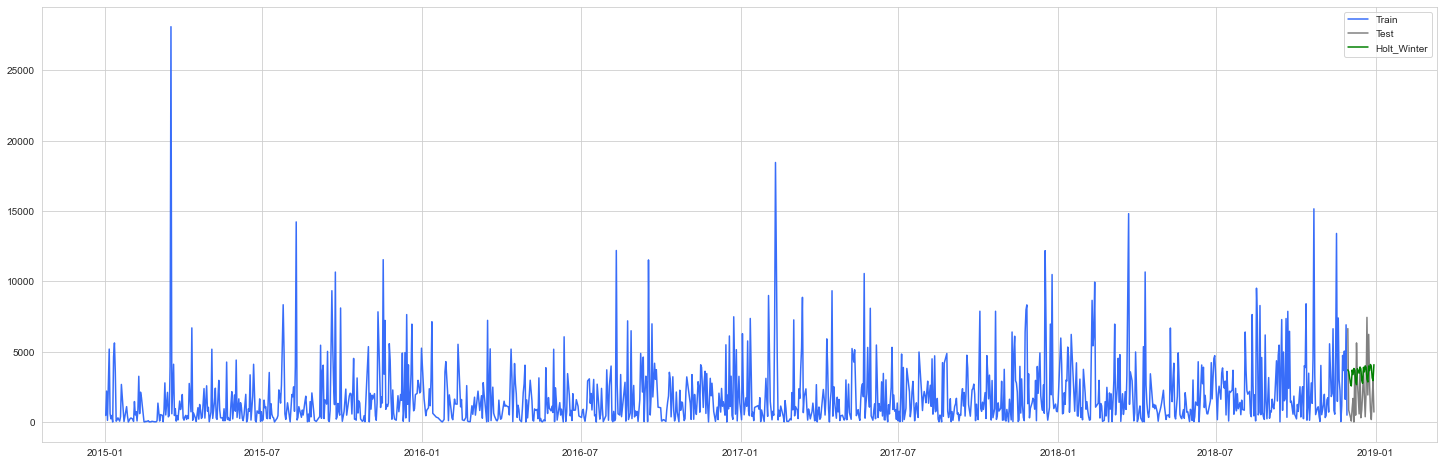

In [32]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=6 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(25,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test', color='grey')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter', color='green')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
print(rms)

2472.6093915154865


### Time Series Modeling with Prophet

In [34]:
df4 = df.copy()
df4.reset_index(drop=True, inplace=True)
df4 = df4[['OrderDate','Sales']].copy()
df4.head()

,OrderDate,Sales
0,2017-08-11,261.9600
1,2017-08-11,731.9400
2,2017-12-06,14.6200
3,2016-11-10,957.5775
4,2016-11-10,22.3680


In [35]:
df5 = df4.copy()
df5 = df5.groupby('OrderDate').mean()
df5.head()

,Sales
OrderDate,
2015-01-02,468.900000
2015-01-03,220.315100
2015-01-04,29.972000
2015-01-06,471.683636
2015-01-07,200.341333


In [36]:
df5.reset_index(inplace=True)
df5

,OrderDate,Sales
0,2015-01-02,468.900000
1,2015-01-03,220.315100
2,2015-01-04,29.972000
3,2015-01-06,471.683636
4,2015-01-07,200.341333
...,...,...
1225,2018-12-26,203.648500
1226,2018-12-27,88.818000
1227,2018-12-28,87.228989
1228,2018-12-29,242.961167


In [37]:
df5 = df5.rename(columns={'OrderDate': 'ds', 'Sales': 'y'})

In [38]:
prediction_size = 30
train_df = df5[:-prediction_size]

In [39]:
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
prophet_model.stan_backend.logger = None
filename = 'prophet_model.h5'
with open(filename, 'wb') as f:
  pickle.dump(prophet_model, f)

In [41]:
future = prophet_model.make_future_dataframe(periods=prediction_size)
forecast = prophet_model.predict(future)

In [42]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,194.398968,-306.185528,779.017962,194.398968,194.398968,40.044192,40.044192,40.044192,-5.105057,-5.105057,-5.105057,45.149249,45.149249,45.149249,0.0,0.0,0.0,234.443160
1,2015-01-03,194.518430,-284.370507,779.237322,194.518430,194.518430,58.214667,58.214667,58.214667,16.181304,16.181304,16.181304,42.033363,42.033363,42.033363,0.0,0.0,0.0,252.733097
2,2015-01-04,194.637892,-302.399896,784.129141,194.637892,194.637892,22.965165,22.965165,22.965165,-15.920023,-15.920023,-15.920023,38.885188,38.885188,38.885188,0.0,0.0,0.0,217.603057
3,2015-01-06,194.876816,-348.066581,736.063156,194.876816,194.876816,13.610836,13.610836,13.610836,-19.505728,-19.505728,-19.505728,33.116564,33.116564,33.116564,0.0,0.0,0.0,208.487651
4,2015-01-07,194.996277,-294.810116,750.842876,194.996277,194.996277,42.338506,42.338506,42.338506,11.533399,11.533399,11.533399,30.805107,30.805107,30.805107,0.0,0.0,0.0,237.334783


<Figure size 1296x432 with 0 Axes>

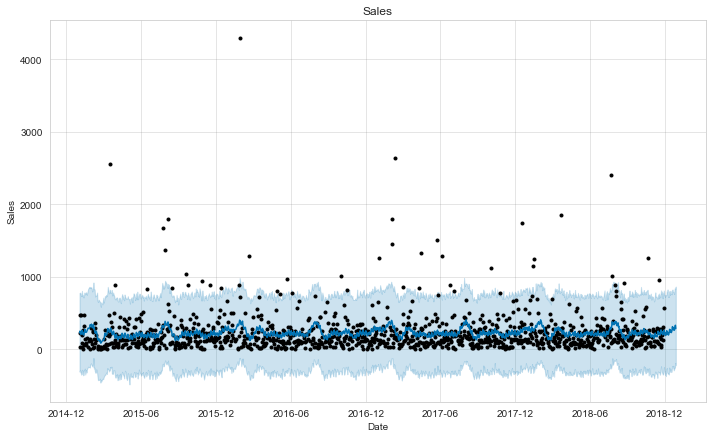

In [43]:
plt.figure(figsize=(18, 6))
prophet_model.plot(forecast, xlabel = 'Date', ylabel = 'Sales');
plt.title('Sales');

In [44]:
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(historical.set_index('ds'))

In [45]:
cmap_df = make_comparison_dataframe(df5, forecast)

In [46]:
def calculate_errors(df, prediction_size):
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]
  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
  return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}


In [47]:
for err_name, err_value in calculate_errors(cmap_df, prediction_size).items():
  print(err_name, err_value)

MAPE 316.6515153113796
MAE 127.24087046208888


In [48]:
def calculate_mse(df, prediction_size):
  df = df[-prediction_size:]
  mse = ((df['y'] - df['yhat'])**2).mean()
  rmse = np.sqrt(mse)
  return mse, rmse

In [49]:
mse, rmse = calculate_mse(cmap_df, prediction_size)
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', round(rmse, 4))

Mean Square Error is: 20595.8264
Root Mean Square Error is: 143.5125


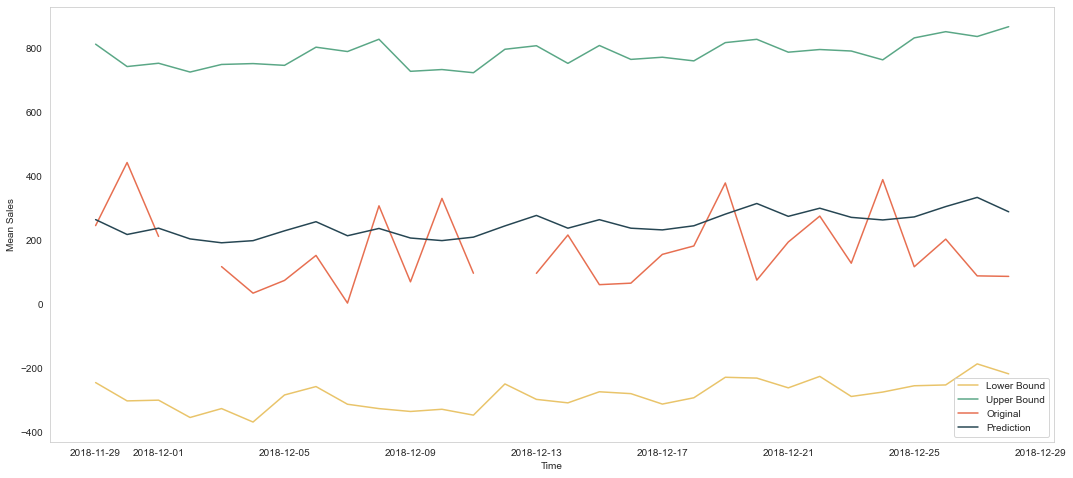

In [50]:
colors = ["#e9c46a","#5AA786","#E76F51","#264653"]
sns.set_palette(colors)
plt.figure(figsize=(18,8))
plt.plot(cmap_df['yhat_lower'][-prediction_size:], label='Lower Bound')
plt.plot(cmap_df['yhat_upper'][-prediction_size:], label='Upper Bound')
plt.plot(cmap_df['y'][-prediction_size:], label='Original')
plt.plot(cmap_df['yhat'][-prediction_size:], label='Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Sales')
plt.grid(False)
plt.legend()
plt.show();

In [51]:
future2 = prophet_model.make_future_dataframe(periods=40, freq= 'D')
forecast2 = prophet_model.predict(future2)

In [52]:
forecast2.tail(7)[['ds','yhat']]

,ds,yhat
1233,2019-01-01,267.362269
1234,2019-01-02,295.473161
1235,2019-01-03,320.502425
1236,2019-01-04,272.579969
1237,2019-01-05,290.846526
1238,2019-01-06,256.005705
1239,2019-01-07,242.761151


In [53]:
submit = forecast2.tail(7)[['ds','yhat']]

In [54]:
submit.yhat = submit.yhat.round(3)

In [55]:
submit.to_csv('Output.csv',header=['OrderDate', 'Sales'],index=False)